In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("C:\\Users\\gutzh\\intern'\\AMAZON-SALES-ANALYSIS\\Amazon Sales data.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month
0,Europe,Albania,Clothes,Online,C,2010-02-02,385383069,3/18/2010,2269,109.28,35.84,247956.32,81320.96,166635.36,2010,2
1,Middle East and North Africa,Azerbaijan,Cosmetics,Online,M,2010-02-06,382392299,2/25/2010,7234,437.20,263.33,3162704.80,1904929.22,1257775.58,2010,2
2,Sub-Saharan Africa,Mali,Fruits,Online,L,2010-05-07,686048400,5/10/2010,5822,9.33,6.92,54319.26,40288.24,14031.02,2010,5
3,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
4,Australia and Oceania,Fiji,Clothes,Offline,C,2010-06-30,647876489,8/1/2010,9905,109.28,35.84,1082418.40,354995.20,727423.20,2010,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
 14  year            100 non-null    int64  
 15  month           100 non-null    int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 12.6+ KB


In [4]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,2013.230000,6.260000
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,2.088231,3.353334
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,2010.000000,1.000000
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,2012.000000,4.000000
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,2013.000000,6.000000
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,2015.000000,9.250000
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,2017.000000,12.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df['Item Type'].unique()

array(['Clothes', 'Cosmetics', 'Fruits', 'Baby Food', 'Office Supplies',
       'Personal Care', 'Household', 'Snacks', 'Beverages', 'Vegetables',
       'Cereal', 'Meat'], dtype=object)

In [7]:
df['Order Priority'].unique()

array(['C', 'M', 'L', 'H'], dtype=object)

In [8]:
df['Region'].unique()

array(['Europe', 'Middle East and North Africa', 'Sub-Saharan Africa',
       'Australia and Oceania', 'Asia',
       'Central America and the Caribbean', 'North America'], dtype=object)

In [9]:
df['Country'].unique()

array(['Albania', 'Azerbaijan', 'Mali', 'Tuvalu', 'Fiji', 'Lithuania',
       'Libya', 'Romania', 'Switzerland', 'Turkmenistan', 'Zambia',
       'Sao Tome and Principe', 'Nicaragua', 'Angola',
       'Democratic Republic of the Congo', 'Kyrgyzstan', 'Laos',
       'Cameroon', 'Malaysia', 'Syria', 'Sierra Leone', 'United Kingdom',
       'Mauritania', 'Mozambique', 'Bulgaria', 'Mexico', 'Kenya',
       'Brunei', 'Kuwait', 'The Gambia', 'Monaco', "Cote d'Ivoire",
       'Gabon', 'Burkina Faso', 'East Timor', 'Grenada', 'Lebanon',
       'Slovakia', 'Spain', 'Rwanda', 'Saudi Arabia', 'Australia',
       'San Marino', 'Pakistan', 'Samoa ', 'Lesotho', 'Haiti',
       'South Sudan', 'Mongolia', 'Djibouti', 'Senegal', 'Russia',
       'Norway', 'Cape Verde', 'New Zealand', 'Kiribati', 'Macedonia',
       'Federated States of Micronesia', 'Myanmar', 'Solomon Islands',
       'Austria', 'Madagascar', 'Republic of the Congo', 'Portugal',
       'Comoros', 'Moldova ', 'Honduras', 'Belize', 'Slov

In [10]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
year              0
month             0
dtype: int64

Text(0.5, 1.0, 'Order Priority v/s Sales Channel\n')

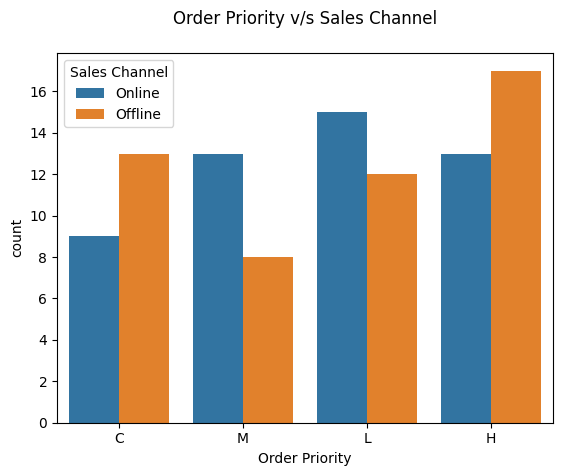

In [11]:
sns.countplot(data= df, x='Order Priority',hue='Sales Channel')
plt.title('Order Priority v/s Sales Channel\n')

[Text(0, 0, 'Clothes'),
 Text(1, 0, 'Cosmetics'),
 Text(2, 0, 'Fruits'),
 Text(3, 0, 'Baby Food'),
 Text(4, 0, 'Office Supplies'),
 Text(5, 0, 'Personal Care'),
 Text(6, 0, 'Household'),
 Text(7, 0, 'Snacks'),
 Text(8, 0, 'Beverages'),
 Text(9, 0, 'Vegetables'),
 Text(10, 0, 'Cereal'),
 Text(11, 0, 'Meat')]

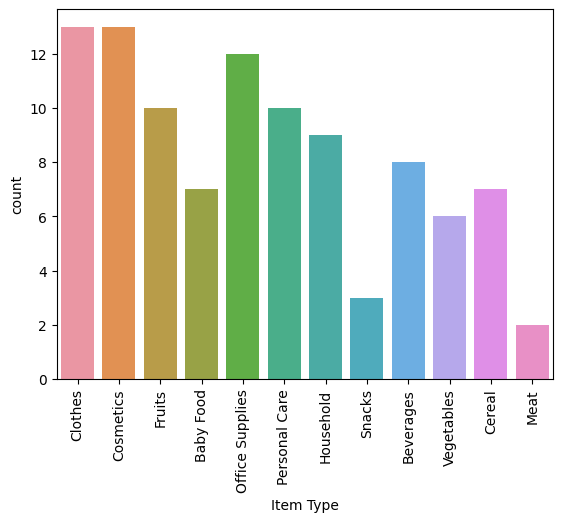

In [12]:
fig,ax=plt.subplots()
sns.countplot(x='Item Type', data=df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Europe'),
 Text(1, 0, 'Middle East and North Africa'),
 Text(2, 0, 'Sub-Saharan Africa'),
 Text(3, 0, 'Australia and Oceania'),
 Text(4, 0, 'Asia'),
 Text(5, 0, 'Central America and the Caribbean'),
 Text(6, 0, 'North America')]

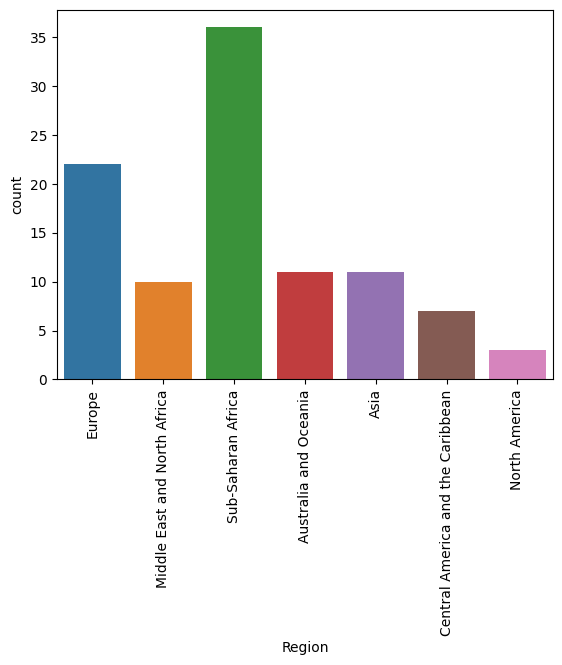

In [13]:
fig,ax=plt.subplots()
sns.countplot(x='Region', data=df, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [14]:
df[df['Region']=='Asia'].head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month
9,Asia,Turkmenistan,Household,Offline,L,2010-12-30,441619336,1/20/2011,3830,668.27,502.54,2559474.10,1924728.20,634745.90,2010,12
15,Asia,Kyrgyzstan,Vegetables,Online,H,2011-06-24,814711606,7/12/2011,124,154.06,90.93,19103.44,11275.32,7828.12,2011,6
17,Asia,Laos,Vegetables,Offline,C,2011-09-15,789176547,10/23/2011,3732,154.06,90.93,574951.92,339350.76,235601.16,2011,9
19,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,11
28,Asia,Brunei,Office Supplies,Online,L,2012-04-01,320009267,5/8/2012,6708,651.21,524.96,4368316.68,3521431.68,846885.00,2012,4


<Axes: >

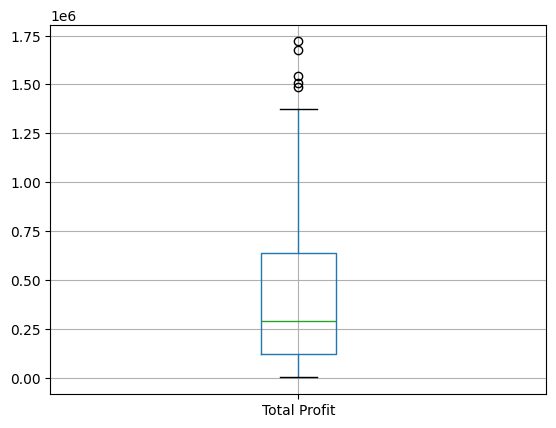

In [15]:
df[['Total Profit']].boxplot()

In [16]:
new_df=df[['Total Profit','Total Revenue']]
new_df

,Total Profit,Total Revenue
0,166635.36,247956.32
1,1257775.58,3162704.80
2,14031.02,54319.26
3,951410.50,2533654.00
4,727423.20,1082418.40
...,...,...
95,404010.78,1117953.66
96,75555.90,246415.95
97,160609.54,523807.57
98,766835.04,1780539.20


In [17]:
new_df.corr()

,Total Profit,Total Revenue
Total Profit,1.000000,0.897327
Total Revenue,0.897327,1.000000


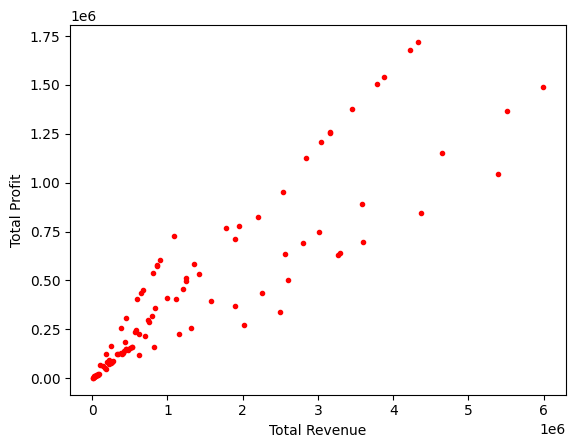

In [18]:
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.scatter(df['Total Revenue'], df['Total Profit'], color='red', marker='.')

Text(0.5, 1.0, 'Year v/s Order')

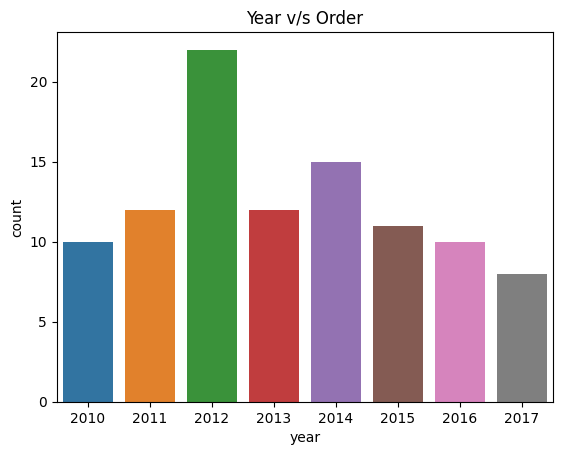

In [19]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year
sns.countplot(data= df, x='year')
plt.title("Year v/s Order")

C:\Users\gutzh\AppData\Local\Temp\ipykernel_7564\1308823765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['month'] = pd.DatetimeIndex(df_['Order Date']).month


Text(0.5, 1.0, 'Year v/s Order')

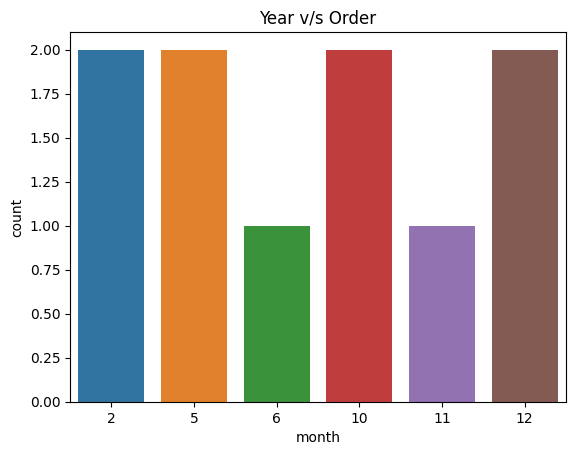

In [20]:
df['month'] = pd.DatetimeIndex(df['Order Date']).month
months=df['month'].unique()
months
df['Order Date'] = pd.to_datetime(df['Order Date'])
df_ = df[df['Order Date'].dt.year == 2010]
df_['month'] = pd.DatetimeIndex(df_['Order Date']).month
df_
sns.countplot(data= df_, x='month')
plt.title("Year v/s Order")

C:\Users\gutzh\AppData\Local\Temp\ipykernel_7564\521123044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['month'] = pd.DatetimeIndex(df_['Order Date']).month
C:\Users\gutzh\AppData\Local\Temp\ipykernel_7564\521123044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['month'] = pd.DatetimeIndex(df_['Order Date']).month
C:\Users\gutzh\AppData\Local\Temp\ipykernel_7564\521123044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

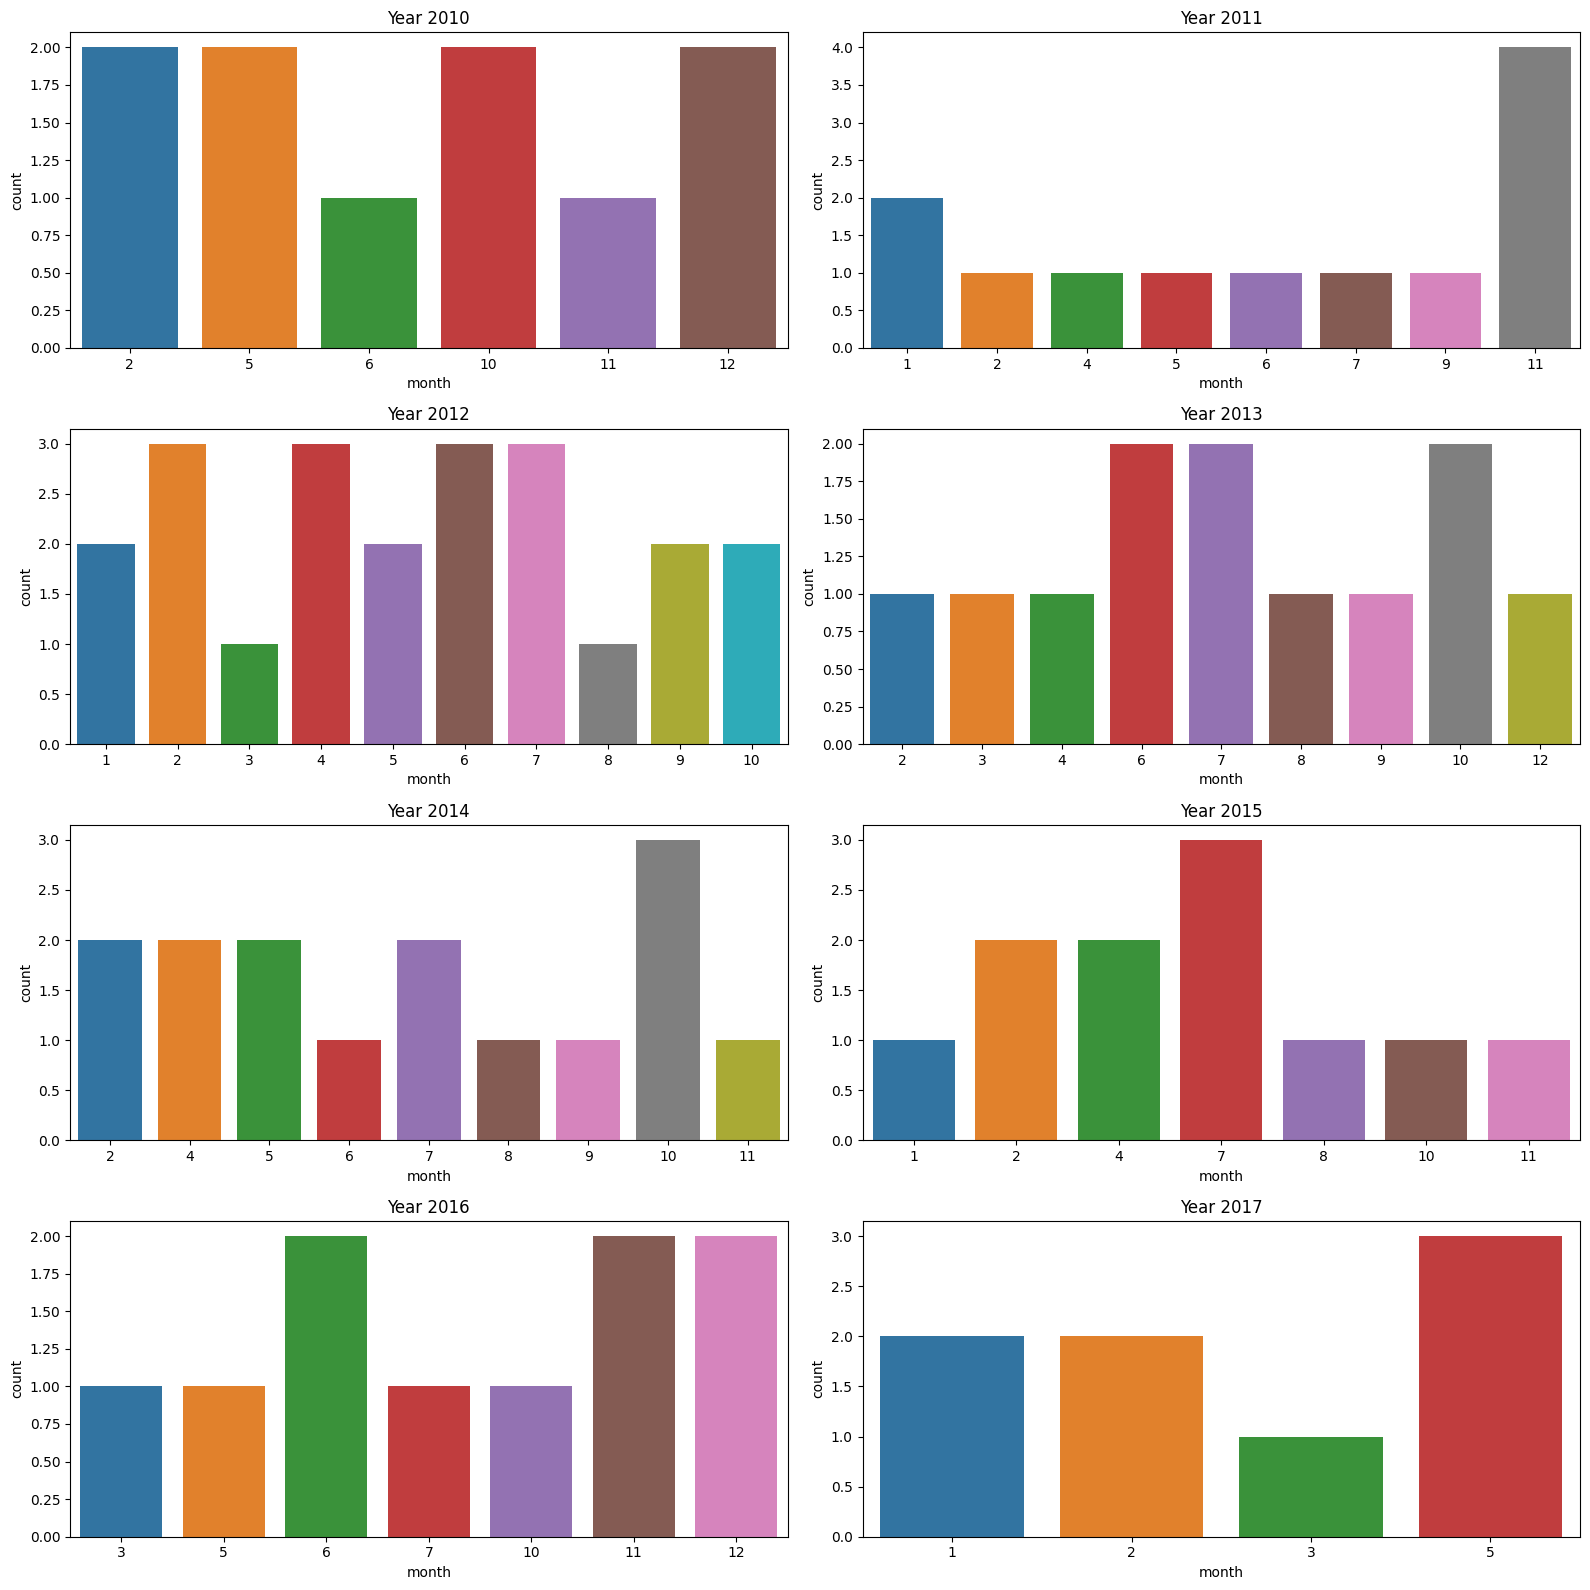

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['year'] = df['Order Date'].dt.year
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
axs = axs.flatten()
for i, year in enumerate(range(2010, 2018)):
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df_ = df[df['Order Date'].dt.year == year]
    df_['month'] = pd.DatetimeIndex(df_['Order Date']).month
    sns.countplot(data= df_, x='month', ax=axs[i])
    axs[i].set_title(f'Year {year}')
plt.tight_layout()
plt.show()

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sort the DataFrame based on 'Date of Birth'
df_sorted = df.sort_values(by='Order Date')

# Save the sorted DataFrame back to a CSV file
df_sorted.to_csv("C:\\Users\\gutzh\\intern'\\AMAZON-SALES-ANALYSIS\\Amazon Sales data.csv", index=False)
df_sorted

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,year,month
0,Europe,Albania,Clothes,Online,C,2010-02-02,385383069,3/18/2010,2269,109.28,35.84,247956.32,81320.96,166635.36,2010,2
1,Middle East and North Africa,Azerbaijan,Cosmetics,Online,M,2010-02-06,382392299,2/25/2010,7234,437.20,263.33,3162704.80,1904929.22,1257775.58,2010,2
2,Sub-Saharan Africa,Mali,Fruits,Online,L,2010-05-07,686048400,5/10/2010,5822,9.33,6.92,54319.26,40288.24,14031.02,2010,5
3,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
4,Australia and Oceania,Fiji,Clothes,Offline,C,2010-06-30,647876489,8/1/2010,9905,109.28,35.84,1082418.40,354995.20,727423.20,2010,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Djibouti,Snacks,Online,M,2017-02-25,756274640,2/25/2017,7327,152.58,97.44,1117953.66,713942.88,404010.78,2017,2
96,Sub-Saharan Africa,Niger,Personal Care,Online,H,2017-03-11,699285638,3/28/2017,3015,81.73,56.67,246415.95,170860.05,75555.90,2017,3
97,Central America and the Caribbean,Costa Rica,Personal Care,Offline,L,2017-05-08,456767165,5/21/2017,6409,81.73,56.67,523807.57,363198.03,160609.54,2017,5
98,Sub-Saharan Africa,Djibouti,Cereal,Online,H,2017-05-20,555990016,6/17/2017,8656,205.70,117.11,1780539.20,1013704.16,766835.04,2017,5


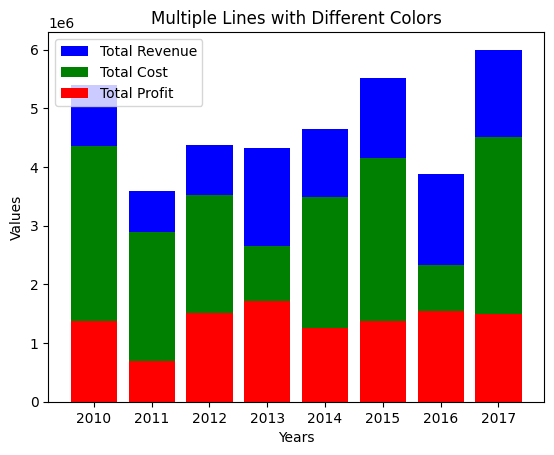

In [23]:
df_sorted['year'] = pd.DatetimeIndex(df_sorted['Order Date']).year
plt.bar(df_sorted['year'], df_sorted['Total Revenue'], label='Total Revenue', color='blue')
plt.bar(df_sorted['year'], df_sorted['Total Cost'], label='Total Cost', color='green')
plt.bar(df_sorted['year'], df_sorted['Total Profit'], label='Total Profit', color='red')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Multiple Lines with Different Colors')

# Adding legend
plt.legend()

# Display the plot
plt.show()


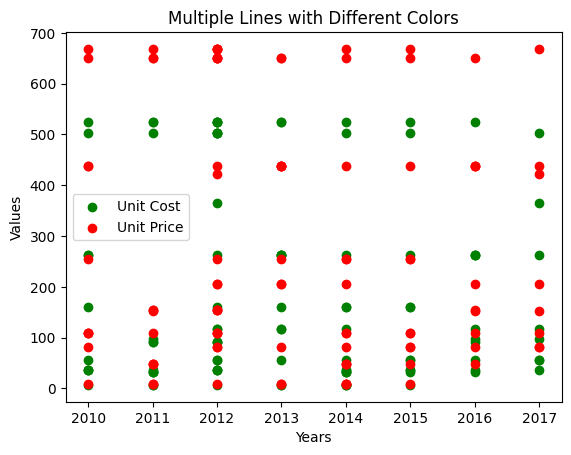

In [24]:
df_sorted['year'] = pd.DatetimeIndex(df_sorted['Order Date']).year
plt.scatter(df_sorted['year'], df_sorted['Unit Cost'], label='Unit Cost', color='green')
plt.scatter(df_sorted['year'], df_sorted['Unit Price'], label='Unit Price', color='red')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Multiple Lines with Different Colors')

# Adding legend
plt.legend()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Region v/s Total Profit')

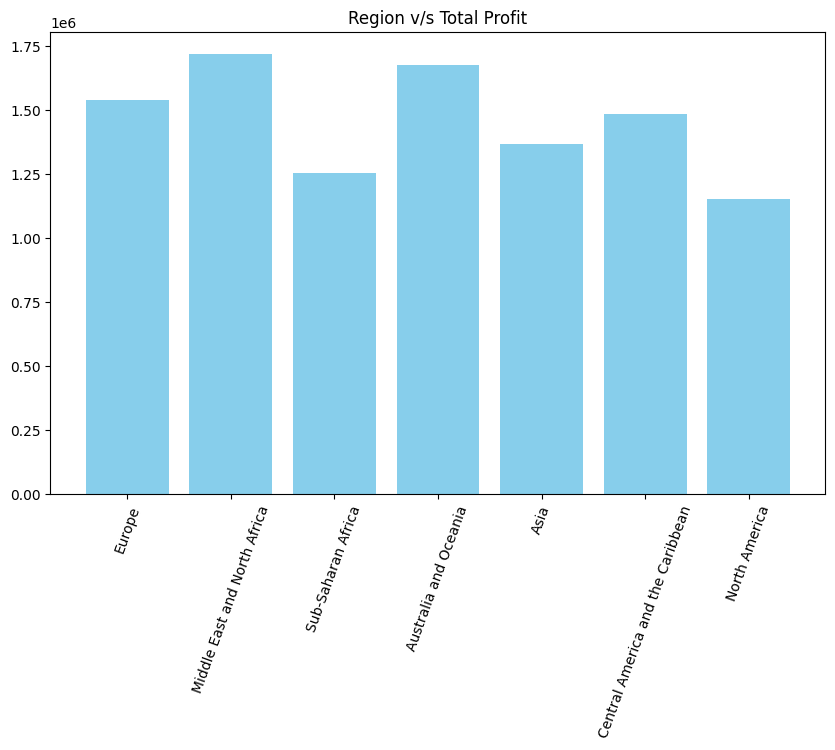

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(df['Region'], df['Total Profit'], color='skyblue')
plt.xticks(rotation=70)
plt.title('Region v/s Total Profit')

In [26]:
yrs = df['year']
yrs.unique()
yrs=pd.DataFrame(yrs)
yrss_sort=yrs.sort_values(by='year')
yrss_sort

,year
0,2010
1,2010
2,2010
3,2010
4,2010
...,...
98,2017
93,2017
92,2017
94,2017


In [27]:
yrs = df['year']
yrrs=pd.DataFrame(yrs.unique())
yrrs_sorted = yrrs.sort_values(by=0)
yrrs_sorted

,0
0,2010
1,2011
2,2012
3,2013
4,2014
5,2015
6,2016
7,2017


In [28]:
yrs_counts = df['year'].value_counts()
counts=pd.DataFrame(yrs_counts)
df_sorted = counts.sort_values(by='year')
df_sorted

,count
year,
2010,10
2011,12
2012,22
2013,12
2014,15
2015,11
2016,10
2017,8


In [29]:
df_sorted.reset_index(drop=True, inplace=True)
df_sorted

,count
0,10
1,12
2,22
3,12
4,15
5,11
6,10
7,8


In [30]:
X = yrrs_sorted[0]
X = X.values.reshape(-1, 1)
y = df_sorted['count']
y = y.values.reshape(-1, 1)
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [31]:
future_year =[[2024]]
PredictedmodelResult = model.predict(future_year)
print(PredictedmodelResult)

[[5.75]]


In [32]:
future_year =[[2030]]
PredictedmodelResult = model.predict(future_year)
print(PredictedmodelResult)

[[1.89285714]]


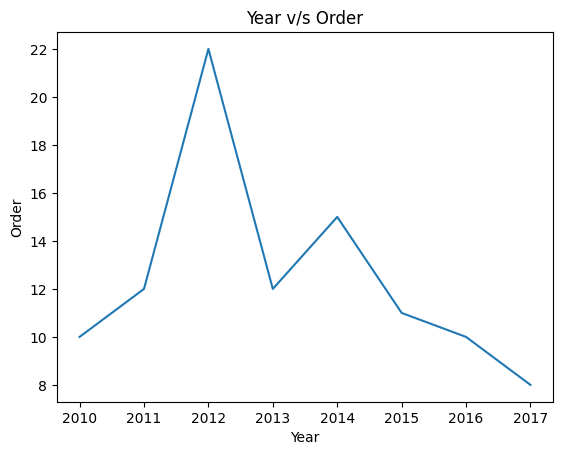

In [33]:
X = yrrs_sorted[0]
X = X.values.reshape(-1, 1)
y = df_sorted['count']
y = y.values.reshape(-1, 1)
plt.plot(X,y)
plt.xlabel('Year')
plt.ylabel('Order')
plt.title('Year v/s Order')
plt.show()

In [34]:
total_profit=df['Total Profit']
total_profit

0      166635.36
1     1257775.58
2       14031.02
3      951410.50
4      727423.20
         ...    
95     404010.78
96      75555.90
97     160609.54
98     766835.04
99     315574.05
Name: Total Profit, Length: 100, dtype: float64

In [35]:
total_revenue=df['Total Revenue']
total_revenue

0      247956.32
1     3162704.80
2       54319.26
3     2533654.00
4     1082418.40
         ...    
95    1117953.66
96     246415.95
97     523807.57
98    1780539.20
99     793518.00
Name: Total Revenue, Length: 100, dtype: float64

In [36]:
res=pd.concat([total_profit,total_revenue], axis=1)
res

,Total Profit,Total Revenue
0,166635.36,247956.32
1,1257775.58,3162704.80
2,14031.02,54319.26
3,951410.50,2533654.00
4,727423.20,1082418.40
...,...,...
95,404010.78,1117953.66
96,75555.90,246415.95
97,160609.54,523807.57
98,766835.04,1780539.20
